### Exercise 1: Creating Bar Plot for Temporal Data 

**Import pandas library and read DataFrame from DATA_PATH**

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np 
from pathlib import Path
DATA_PATH = Path("../datasets/chap5_data/") 

**Read data and parse the `Date` column**

In [2]:
passenger_df = pd.read_csv(DATA_PATH/"AirPassengersDates.csv") 
passenger_df["Date"] = pd.to_datetime(passenger_df["Date"]) 
passenger_df.head()

,Date,#Passengers
0,1949-01-12,112
1,1949-02-24,118
2,1949-03-22,132
3,1949-04-05,129
4,1949-05-24,121


**Create month, day, day-name columns from Date columns**

In [3]:
passenger_df["month"] = passenger_df["Date"].dt.month 
passenger_df["day"] = passenger_df["Date"].dt.day 
passenger_df["day_name"] = passenger_df["Date"].dt.day_name() 

**Aggregate #Passengers column based on month column**

In [4]:
passenger_per_month = passenger_df.groupby(["month"])[["#Passengers"]].agg("sum") 
passenger_per_month = passenger_per_month.reset_index() 
passenger_per_month.head() 

,month,#Passengers
0,1,2901
1,2,2820
2,3,3242
3,4,3205
4,5,3262


**Import the needed libraries and set the figure size**

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 
plt.figure(figsize=(16,8))

<Figure size 1152x576 with 0 Axes>

<Figure size 1152x576 with 0 Axes>

**Create barplot using sns and pass the column names to x-axis and y-axis. Now we will use `passenger_per_month` DataFrame as it has been processed above.**

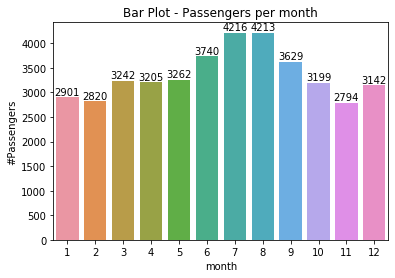

In [10]:
ax = sns.barplot(x="month",y="#Passengers", data=passenger_per_month) 
ax.set_title("Bar Plot - Passengers per month")

#Annotate the bars with value to have better 
for p, v in zip(ax.patches, passenger_per_month['#Passengers']): 
    height = p.get_height() 
    ax.text(p.get_x() + p.get_width() / 2, height + 5, v, 
            ha='center', va='bottom') 
plt.show()